In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
plt.style.use('fivethirtyeight')

In [72]:
users=pd.read_csv('takehome_users.csv',encoding='cp1252')
engagement=pd.read_csv('takehome_user_engagement.csv')

In [73]:
users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [74]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [75]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [76]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [77]:
## Filling NaN values
users['last_session_creation_time'].fillna(users['last_session_creation_time'].median(), inplace=True)
users['invited_by_user_id'].fillna(0, inplace=True)

In [78]:
users['creation_time'] = pd.to_datetime(users['creation_time'])
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [79]:
## finding out if a user can be considered an adopted user
engagement.set_index('time_stamp', inplace = True)
engagement = engagement.groupby('user_id').resample('7D').sum()

engagement['adopted'] = np.where(engagement['visited'] >= 3, 1, 0)
engagement.drop(['user_id'], inplace = True, axis = 1)
engagement.reset_index(inplace=True)

engagement.head()

,user_id,time_stamp,visited,adopted
0,1,2014-04-22 03:53:30,1,0
1,2,2013-11-15 03:45:04,1,0
2,2,2013-11-22 03:45:04,0,0
3,2,2013-11-29 03:45:04,1,0
4,2,2013-12-06 03:45:04,1,0
5,2,2013-12-13 03:45:04,0,0
6,2,2013-12-20 03:45:04,1,0
7,2,2013-12-27 03:45:04,1,0
8,2,2014-01-03 03:45:04,1,0
9,2,2014-01-10 03:45:04,0,0


In [80]:
engagement['count'] = engagement.groupby('user_id')['visited'].transform('sum')
userCounts = engagement[['user_id', 'count']].drop_duplicates(['user_id', 'count'], inplace = False)
userCounts.head()

,user_id,count
0,1,1
1,2,14
21,3,1
22,4,1
23,5,1


In [81]:
users.drop(['creation_time', 'name', 'last_session_creation_time', 'email'], axis = 1, inplace = True)

In [82]:
users.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,GUEST_INVITE,1,0,11,10803.0
1,2,ORG_INVITE,0,0,1,316.0
2,3,ORG_INVITE,0,0,94,1525.0
3,4,GUEST_INVITE,0,0,1,5151.0
4,5,GUEST_INVITE,0,0,193,5240.0


In [84]:
##preparing dataset for predictive modeling
users_pred=pd.get_dummies(users,columns=['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip'])

In [85]:
users_pred.head()

,object_id,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1
0,1,11,10803.0,1,0,0,0,0,0,1,1,0
1,2,1,316.0,0,1,0,0,0,1,0,1,0
2,3,94,1525.0,0,1,0,0,0,1,0,1,0
3,4,1,5151.0,1,0,0,0,0,1,0,1,0
4,5,193,5240.0,1,0,0,0,0,1,0,1,0


In [88]:
user_eng=pd.merge(engagement,users_pred, left_on = ['user_id'], right_on = ['object_id'], how = 'left')
user_eng=pd.merge(user_eng,userCounts, left_on = ['invited_by_user_id'], right_on = ['user_id'], how = 'left')

In [93]:
user_eng=user_eng.drop(['time_stamp','visited','user_id_y','count_y'],axis=1)

In [95]:
user_eng.head()

,user_id_x,adopted,count_x,object_id,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1
0,1,0,1,1,11,10803.0,1,0,0,0,0,0,1,1,0
1,2,0,14,2,1,316.0,0,1,0,0,0,1,0,1,0
2,2,0,14,2,1,316.0,0,1,0,0,0,1,0,1,0
3,2,0,14,2,1,316.0,0,1,0,0,0,1,0,1,0
4,2,0,14,2,1,316.0,0,1,0,0,0,1,0,1,0


In [96]:
target = user_eng['adopted']
variables = user_eng
variables.drop('adopted', axis = 1, inplace = True)

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size=0.25, random_state=0)

In [101]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


predictions = logisticRegr.predict(x_test)

In [102]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.7346060636035412


In [103]:
## using random forests to see which variables are most important
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

rf.fit(x_train, y_train);

In [104]:
feature_list = list(user_eng.columns)

In [105]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: count_x              Importance: 0.86
Variable: org_id               Importance: 0.04
Variable: user_id_x            Importance: 0.02
Variable: object_id            Importance: 0.02
Variable: invited_by_user_id   Importance: 0.02
Variable: creation_source_GUEST_INVITE Importance: 0.0
Variable: creation_source_ORG_INVITE Importance: 0.0
Variable: creation_source_PERSONAL_PROJECTS Importance: 0.0
Variable: creation_source_SIGNUP Importance: 0.0
Variable: creation_source_SIGNUP_GOOGLE_AUTH Importance: 0.0
Variable: opted_in_to_mailing_list_0 Importance: 0.0
Variable: opted_in_to_mailing_list_1 Importance: 0.0
Variable: enabled_for_marketing_drip_0 Importance: 0.0
Variable: enabled_for_marketing_drip_1 Importance: 0.0


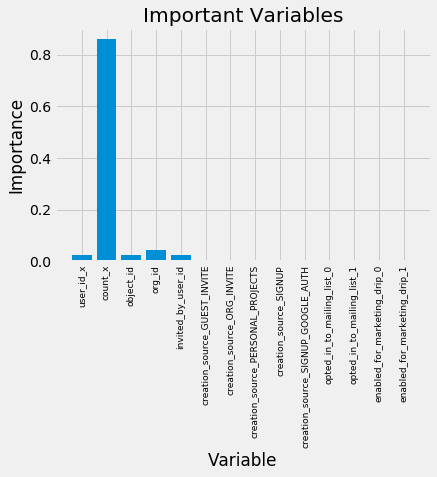

In [108]:
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Important Variables'); 
plt.tick_params(axis='x', which='major', labelsize=9)

The results of this predictive model shows that the amount of times a user visits is the best indicator in predicting user adoption.  This can make sense because if an adopted user is defined as a user that logs into the product on three separate occasions, then the number of times the user visits the product would be the best indicator.